# Car Price Prediction
### Notebook has following sections:

# Section 1. Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Understanding the features and data

## 1.symboling

In [6]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
df['symboling'].astype('category').value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

## 2.Fuel Type

In [7]:
# Car fuel type i.e gas or diesel (Categorical)	
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

## 3.Aspiration

In [8]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

## 4.Door Number

In [9]:
# Number of doors in a car (Categorical)	
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

## 5.Carbody

In [10]:
#body of car (Categorical)	
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

# 6.Drivewheel

In [11]:
#type of drive wheel (Categorical)	-- frontwheel, rear wheel or four-wheel drive 
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

## 7.Enginelocation

In [12]:
# location of car engine (Categorical)
df['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

# 8.Enginetype

In [13]:
# Type of engine.
df['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

## 9.Cylinder Number

In [14]:
# cylinder placed in the car
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

## 10.Fuel System

In [15]:
# Fuel system of car 
df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

### Label Encoding

In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
df['fueltype'].replace({'gas':1,'diesel':0},inplace=True)
df['aspiration'].replace({'std':1,'turbo':0},inplace=True)
df['doornumber'].replace({'four':1,'two':0},inplace=True)
df['carbody'].replace({'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5},inplace=True)
df['drivewheel'].replace({'fwd':1,'rwd':2,'4wd':3},inplace=True)
df['enginelocation'].replace({'front':1,'rear':0},inplace=True)
df['enginetype'].replace({'ohc':1,'ohcf':2,'ohcv':3,'dohc':4,'l':5,'rotor':6,'dohcv':7},inplace=True)
df['cylindernumber'].replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12},inplace=True)
df['fuelsystem'].replace({'mpfi':1,'2bbl':2,'idi':3,'1bbl':4,'spdi':5,'4bbl':6,'mfi':7,'spfi':8},inplace=True)

Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

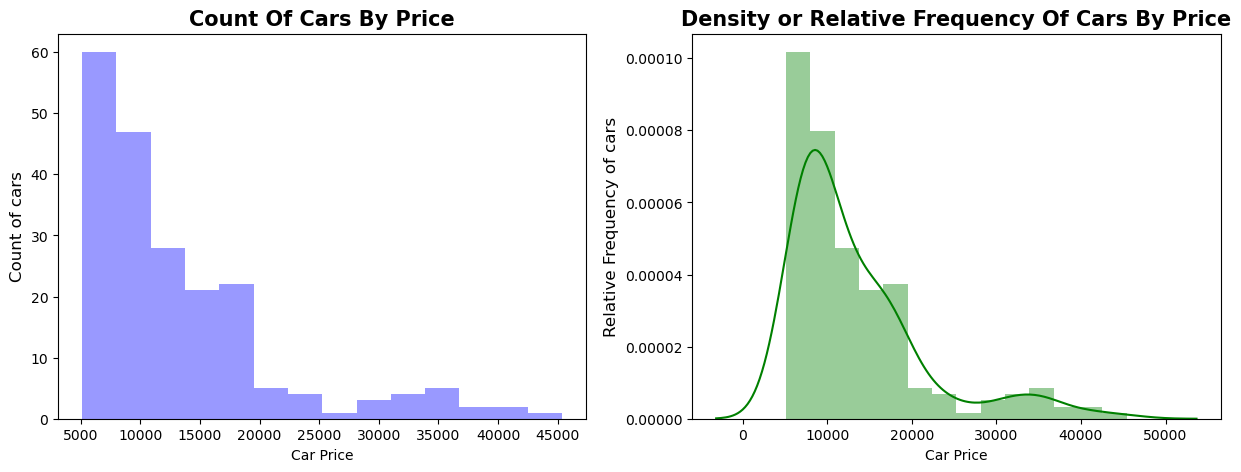

In [18]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(df['price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

## Observations on Target Variable- Price:


# Data Exploration

In [19]:
#creating df  with numeric var's only
cars_numeric=df.select_dtypes(include=['float64','int64'])
cars_numeric.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,5,2,1,88.6,168.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,1,0,5,2,1,88.6,168.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,2,2,1,94.5,171.2,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,1,1,1,1,1,99.8,176.6,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,1,1,1,3,1,99.4,176.6,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
# dropping symboling and car_ID as symboling is more of categorical variable as described before and car_ID is only 
#an index type variable and not a predictor
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,0,5,2,1,88.6,168.8,64.1,48.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,0,5,2,1,88.6,168.8,64.1,48.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,2,1,94.5,171.2,65.5,52.4,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,1,1,1,1,99.8,176.6,66.2,54.3,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,1,1,3,1,99.4,176.6,66.4,54.3,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0


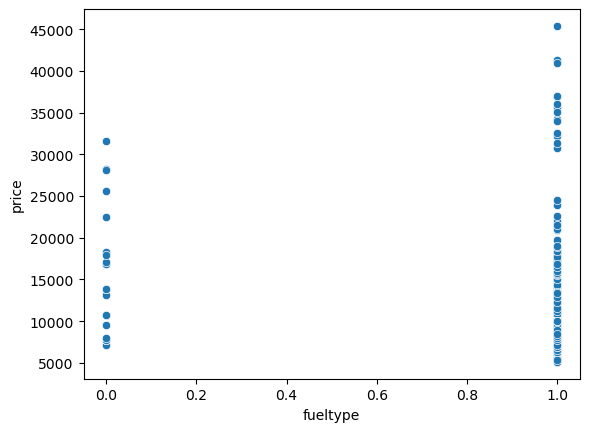

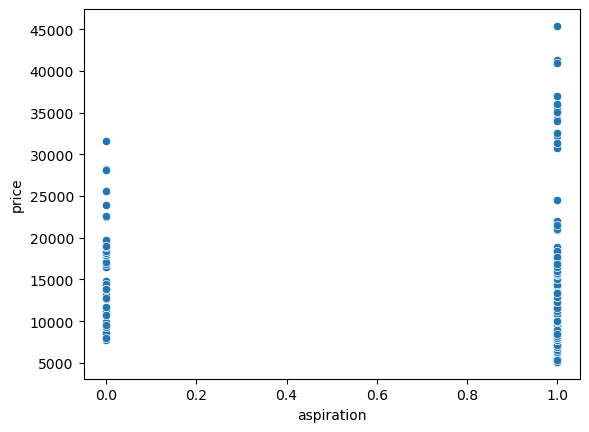

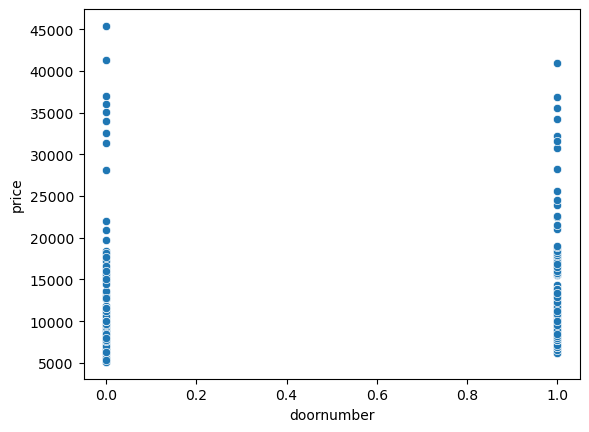

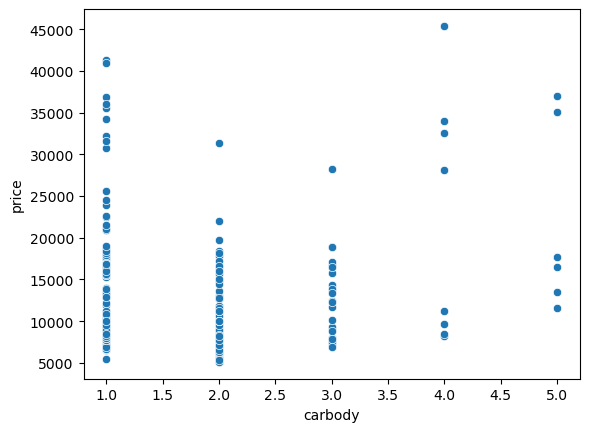

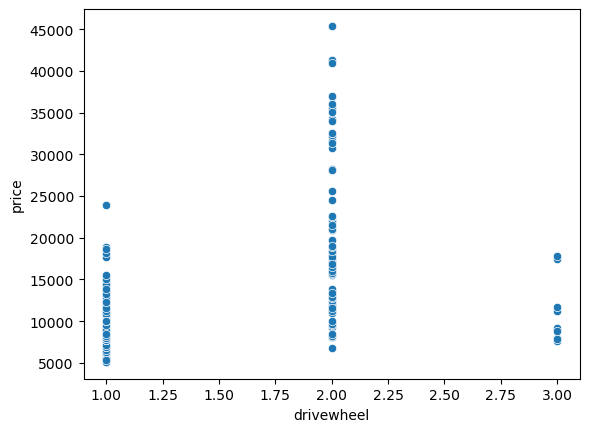

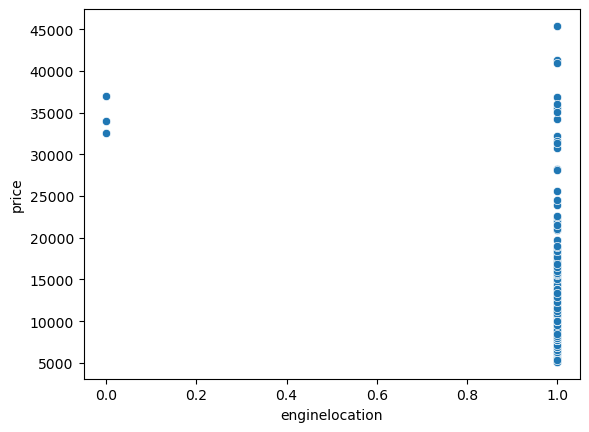

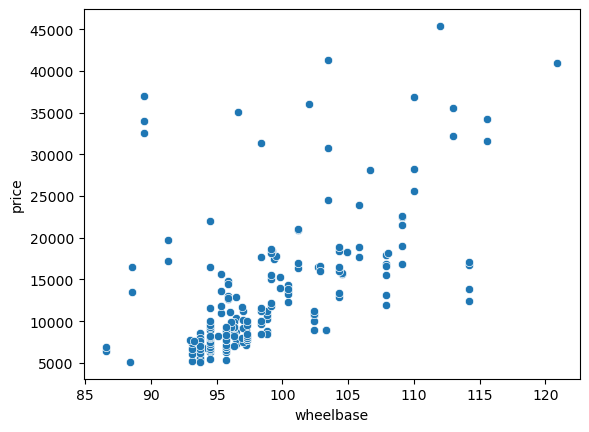

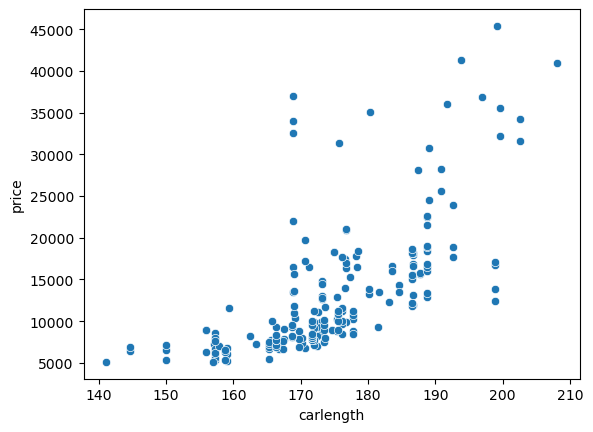

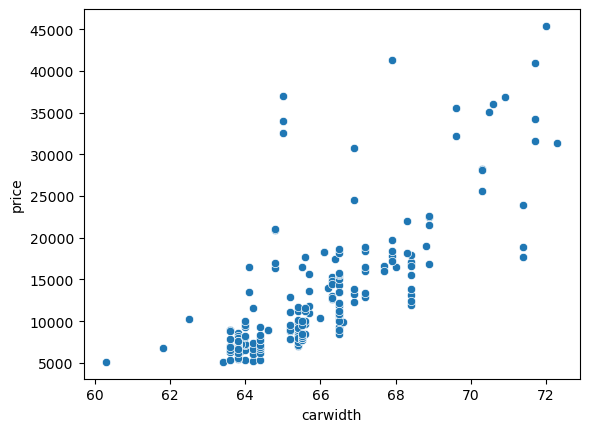

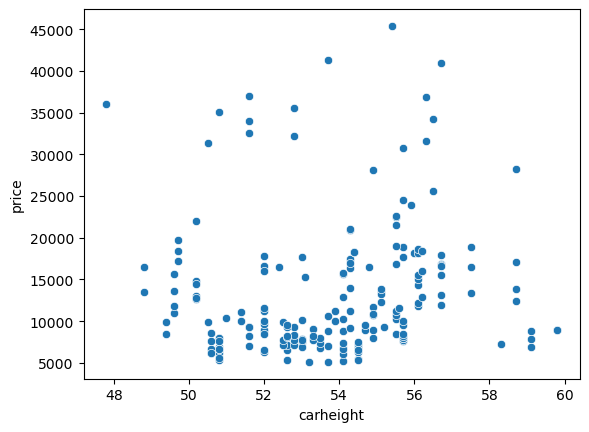

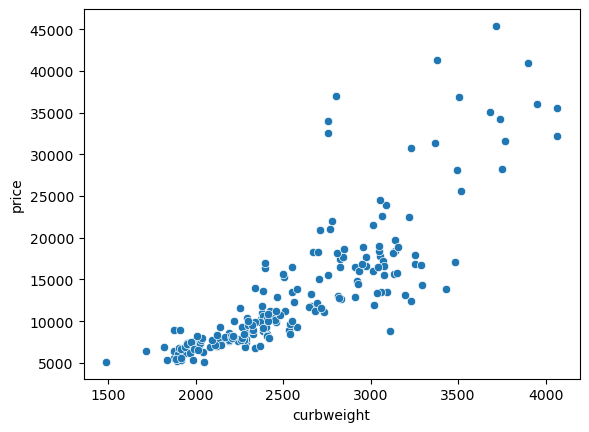

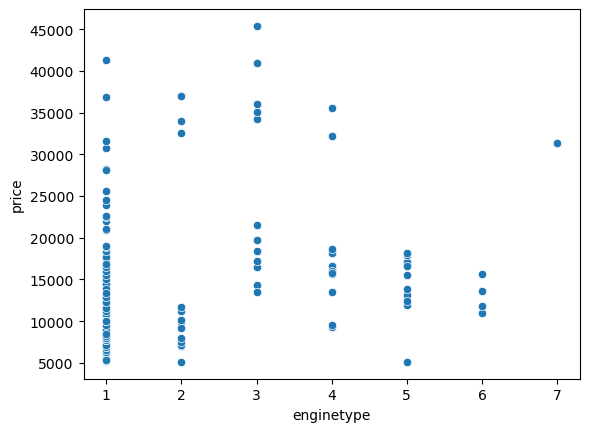

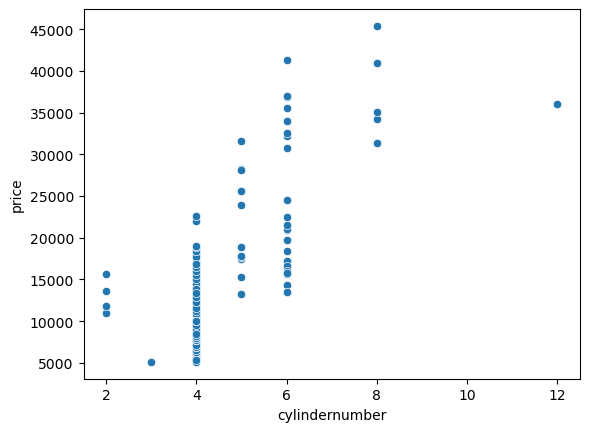

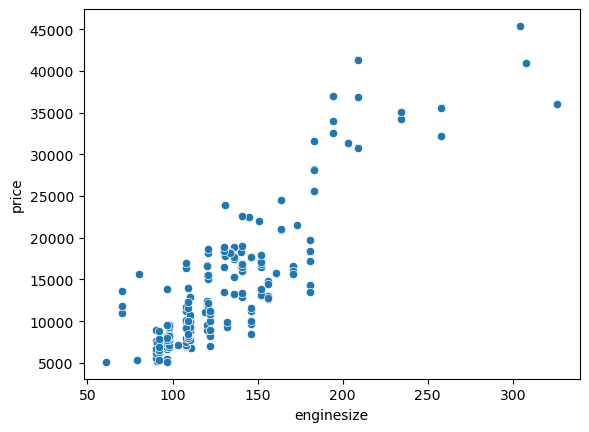

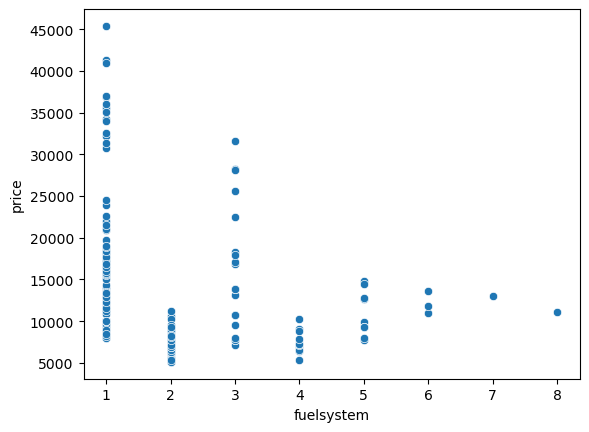

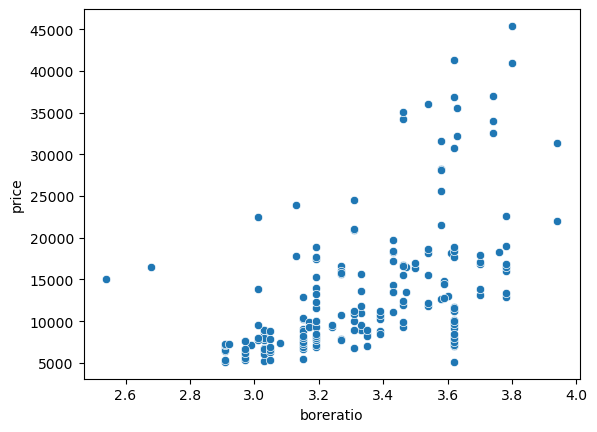

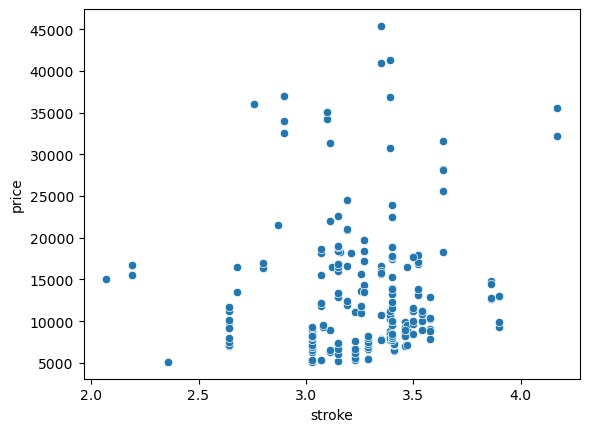

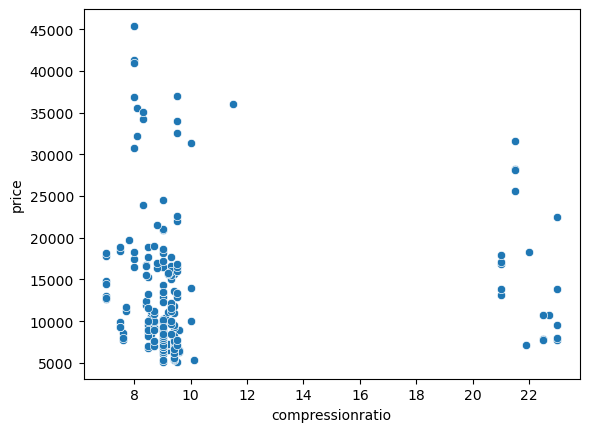

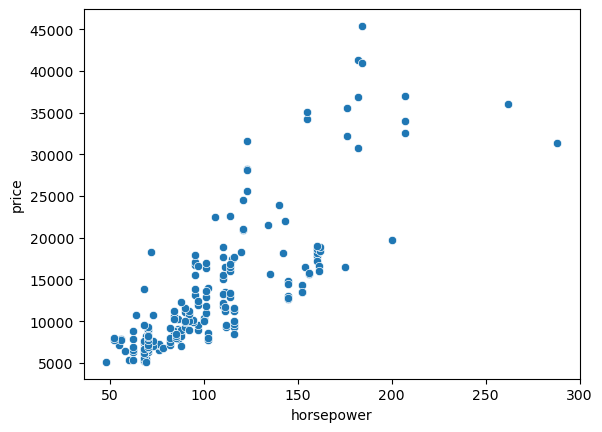

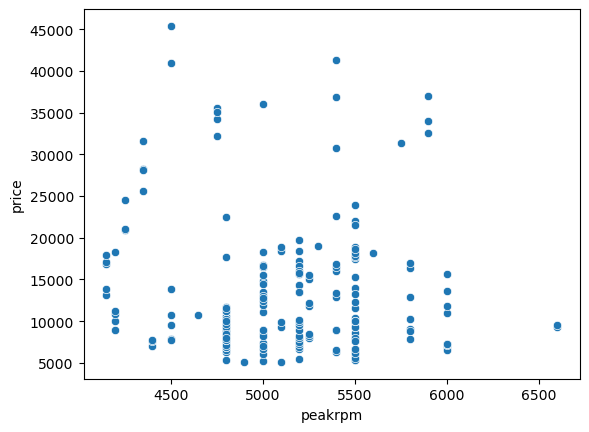

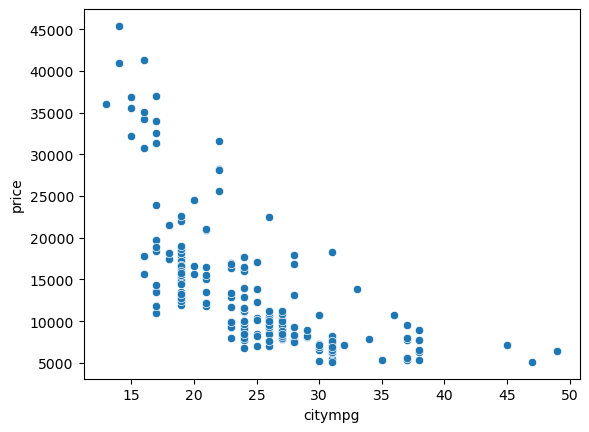

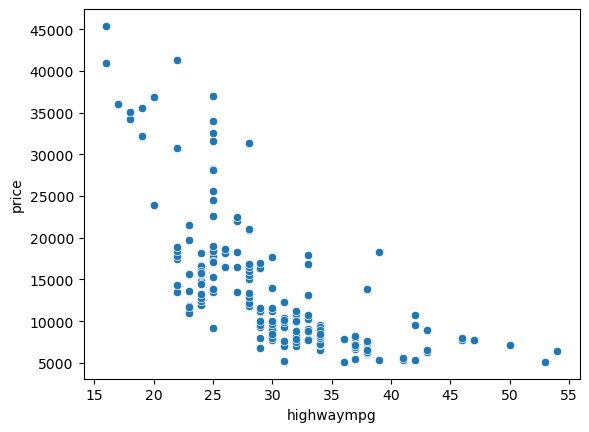

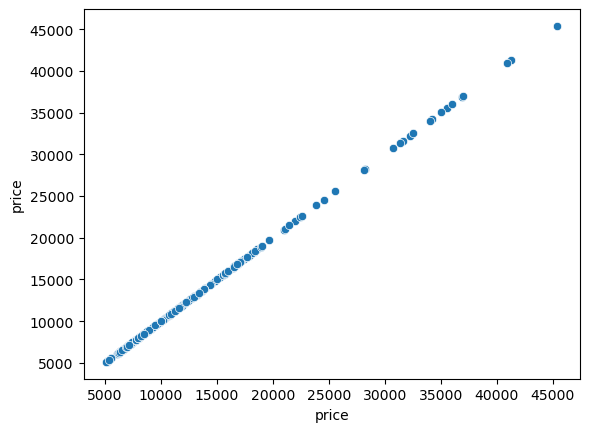

In [21]:
#LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

for i, col in enumerate (cars_numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=cars_numeric[col],y=cars_numeric['price'])

#### # These var's appears to have a linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and citympg.

#### # Other variables either don't have a relation with price or relationship isn't strong. None of the varibales appear to have polynomial relation with price.

#### # In linear regression assumptions validation section we will check for linearity assumption in detail

# Correlation matrix

<Axes: >

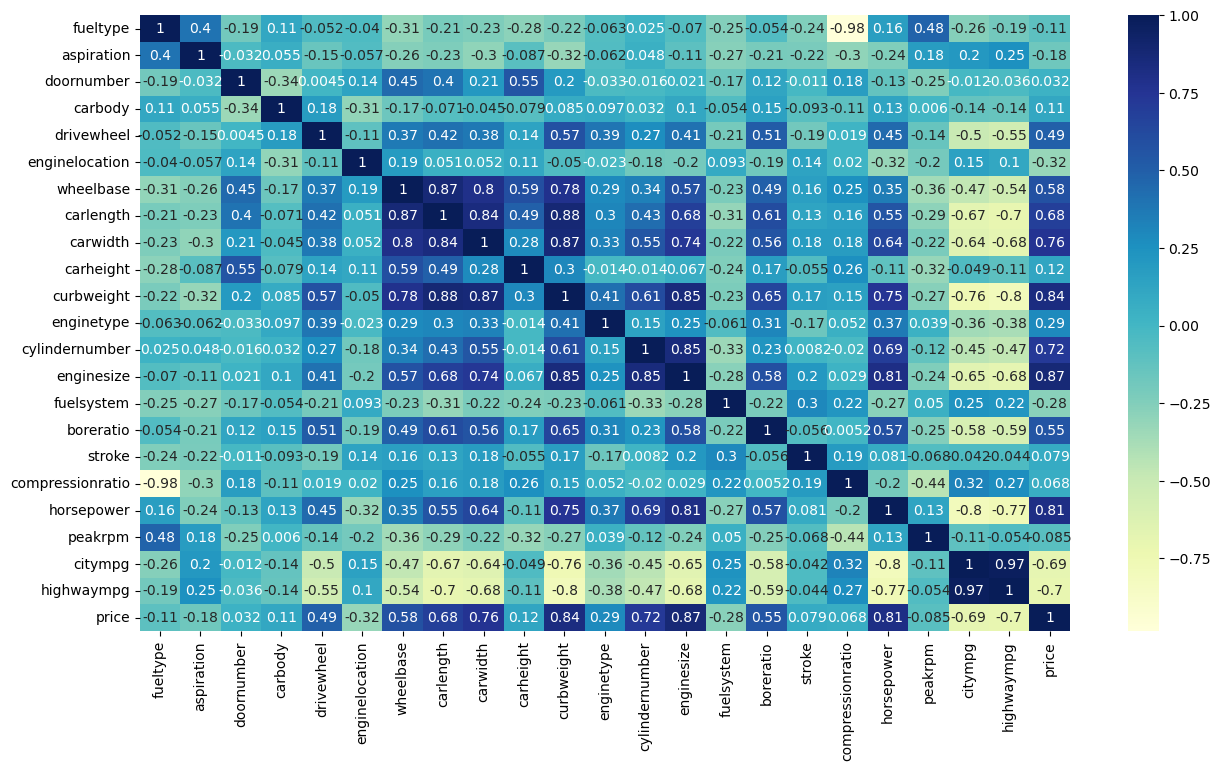

In [22]:
corr=cars_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

# Useful insights from Corr Heatmap

Positive corr: Price highly correlated with enginesize, curbweight, horsepower, carwidth 

Negative corr: Price negatively corr with mpg var's citympg and highwaympg. This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg

Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

# Section 2: Data Cleaning: Missing values and feature data type check

In [23]:
df.info()

#no missing values

#all var's in correct format, however since symboling is a categorical var we need to change its type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [35]:
# drop carname variable
df =  df.drop('CarName', axis=1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,0,5,2,1,88.6,168.8,64.1,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,0,5,2,1,88.6,168.8,64.1,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,2,2,1,94.5,171.2,65.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,1,1,1,1,1,99.8,176.6,66.2,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,1,1,1,3,1,99.4,176.6,66.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,1,1,1,2,1,109.1,188.8,68.9,...,141,1,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,0,1,1,2,1,109.1,188.8,68.8,...,141,1,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,1,1,1,2,1,109.1,188.8,68.9,...,173,1,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,0,1,1,2,1,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# Section 3. Data Preparation: feature engineering

In [36]:
X=df.drop(columns=['price'])
y=df['price']

In [37]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,1,0,5,2,1,88.6,168.8,64.1,...,4,130,1,3.47,2.68,9.0,111,5000,21,27
1,3,1,1,0,5,2,1,88.6,168.8,64.1,...,4,130,1,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,2,2,1,94.5,171.2,65.5,...,6,152,1,2.68,3.47,9.0,154,5000,19,26
3,2,1,1,1,1,1,1,99.8,176.6,66.2,...,4,109,1,3.19,3.40,10.0,102,5500,24,30
4,2,1,1,1,1,3,1,99.4,176.6,66.4,...,5,136,1,3.19,3.40,8.0,115,5500,18,22


In [38]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [39]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Section 4. Model Building and Feature Selection using RFE

In [40]:
# Model with all features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , accuracy_score , mean_absolute_error , mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [41]:
y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

## Data Evaluation

In [42]:
# Testing Data Evaluation

y_pred= lm.predict(X_test)

mse = mean_squared_error(y_test,y_pred_test)
print('MSE',mse)

rmse = np.sqrt(mse)
print('RMSE',rmse)

r2 = r2_score(y_test,y_pred)
print('R2',r2)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 12911813.901022974
RMSE 3593.301253864331
R2 0.8156221548547846
MAE 2560.768850555921


In [43]:
y_pred_train = lm.predict(X_train)

mse= mean_squared_error(y_train, y_pred_train )
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_train,y_pred_train )
print('R2:',r2)

mae= mean_absolute_error(y_train, y_pred_train )
print('MAE:',mae)

MSE: 6823591.371921055
RMSE: 2612.200484633799
R2: 0.8872573490798872
MAE: 1891.2449846036945


In [47]:
adj_r2 = 1- ((1-r2)*(len(X_test)-1)/ (len(X_test) - len(X.columns)-1))
print('Adjusted r_squared:',adj_r2)

Adjusted r_squared: 0.8190183761545557


In [48]:
residual = y_train - y_pred_train
residual

122    -239.680797
125    -342.220999
166     799.594985
1      2973.808567
199     266.572557
          ...     
87    -1623.087521
103   -5442.055498
67    -1409.302229
24     -495.965207
8      3099.250281
Name: price, Length: 143, dtype: float64

# Q-Q Plot

In [49]:
import scipy.stats as sts
import statsmodels.api as sm

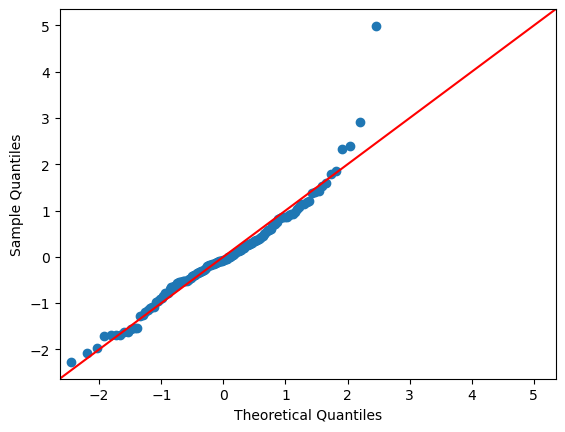

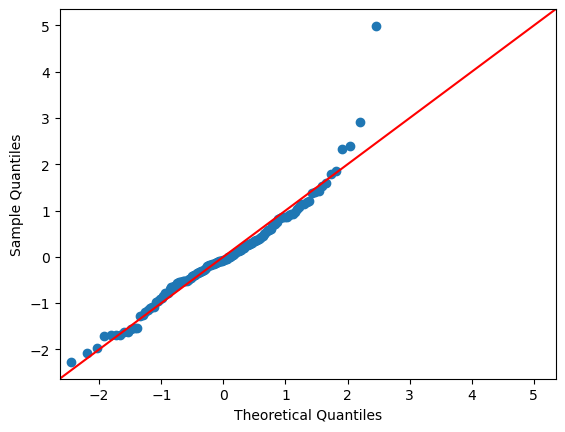

In [50]:
sm.qqplot(residual, line ='45',fit= True)

## Observations:

## Conclusion: